# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


### Question(s) for Analysis
<ul>
<li><a href="#most_appearance">Directors/Actors has the most appearances in film?</a></li>
<li><a href="#top_movies">Top movies based on vote_average/revenue_adj</a></li>
<li><a href="#top_genres">Top genres based on popularity/budget_adj/revenue_adj through years</a></li>
<li><a href="#avg_year">Average budget_adj/revenue_adj of movies through years</a></li>
<li><a href="#corr">Is there any correlation between vote_average, popularity and budget_adj</a></li>
</ul>

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling


### General Properties

#### Load data and inspect the first 5 rows

>Here, we want to inspect the first 5 rows to get some intuition about the dataset. <br>
Columns like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters, indicate some main actors and genres. <br>
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [2]:
data_path = "tmdb-movies.csv"
raw_df = pd.read_csv(data_path)
raw_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Inspect size of the dataset

In [3]:
print(f"The dataset has {raw_df.shape[0]} rows and {raw_df.shape[1]} columns.")

The dataset has 10866 rows and 21 columns.


#### Inspect columns' names and their dtype

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>Here, we can see that there's some null value, e.g missing values in columns "cast" and "director" columns

### Data Cleaning

#### Remove films that missing director or actors

>Therefore, we need to filter out rows that are missing cast or director for the result to be exact

In [5]:
clean_df = raw_df[(~raw_df["cast"].isnull()) & ((~raw_df["director"].isnull()))]
print(f"The cleaned dataset has {clean_df.shape[0]} rows and {clean_df.shape[1]} columns.")

The cleaned dataset has 10752 rows and 21 columns.


#### Remove films that missing budget and revenue

>Moreover, as we also looking to analyze budget and revenue, we also need to filter out rows where these two equal zero

In [6]:
clean_df = clean_df[(clean_df["revenue_adj"] != 0) & (clean_df["budget_adj"] != 0)]
print(f"The cleaned dataset has {clean_df.shape[0]} rows and {clean_df.shape[1]} columns after removing rows with zero budget or revenue.")

The cleaned dataset has 3850 rows and 21 columns after removing rows with zero budget or revenue.


#### Statistic describe

>Basic descriptive statistics are being presented for each column from the cleaned dataset.

In [7]:
clean_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3850.000000,3850.000000,3.850000e+03,3.850000e+03,3850.000000,3850.000000,3850.000000,3850.000000,3.850000e+03,3.850000e+03
mean,39885.746494,1.192778,3.724698e+07,1.077871e+08,109.212987,528.278442,6.168390,2001.260519,4.428989e+07,1.371959e+08
std,67240.164435,1.475462,4.221167e+07,1.766030e+08,19.913488,880.245090,0.794817,11.285056,4.480837e+07,2.161848e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6072.250000,0.463380,1.000000e+07,1.363273e+07,95.000000,71.000000,5.700000,1995.000000,1.317218e+07,1.841498e+07
50%,11316.000000,0.798343,2.400000e+07,4.488472e+07,106.000000,204.500000,6.200000,2004.000000,3.004524e+07,6.179073e+07
75%,38578.000000,1.372826,5.000000e+07,1.242969e+08,119.000000,580.750000,6.700000,2010.000000,6.072867e+07,1.633775e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

<a id="most_appearance"></a>
### Directors/Actors has the most appearances in film?

>The first comes in mind when looking at the dataset is that who (actors/directors) is involved in the most movie till 2015. Let's take a look at the top 20 directors and actors

In [8]:
# Count the number of appearances of each actor and director in the dataset
directors_count = clean_df["director"].str.split("|", expand=True).stack().value_counts().to_dict()

actors_count = clean_df["cast"].str.split("|", expand=True).stack().value_counts().to_dict()


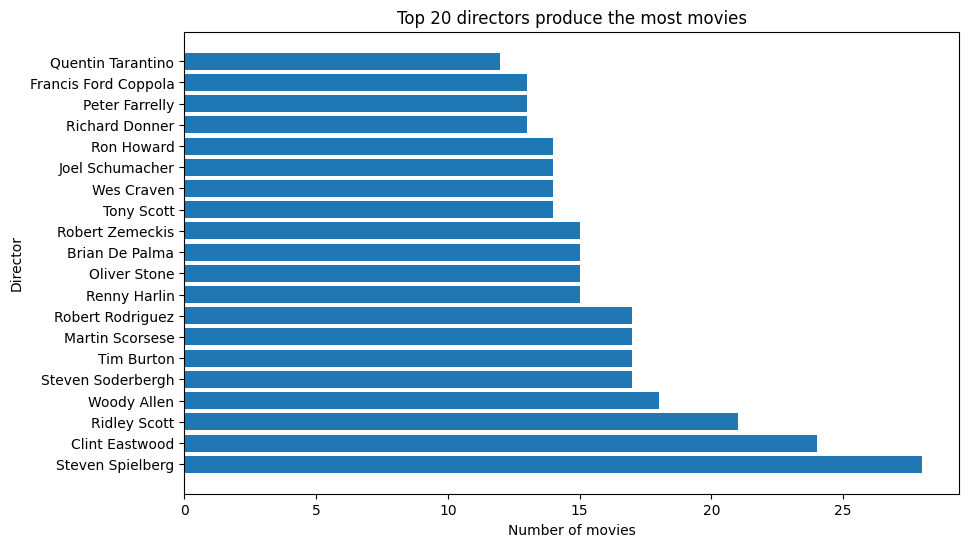

In [9]:
# Plot the top 20 directors
n = 20
top_directors = pd.DataFrame.from_dict(directors_count, orient="index", columns=["count"])
top_directors = top_directors.sort_values(by="count", ascending=False).head(n)
names = top_directors.index.tolist()
counts = top_directors["count"].tolist()

plt.figure(figsize=(10, 6))
plt.barh(names, counts)
plt.xlabel("Number of movies")
plt.ylabel("Director")
plt.title(f"Top {n} directors produce the most movies")
plt.show()

>It is clear from the figure above that the top 5 directors that produces the most movie are Steven Spielberg, Clint Eastwood, Ridly Scott, Woody Allen and Steven Soderbergh.

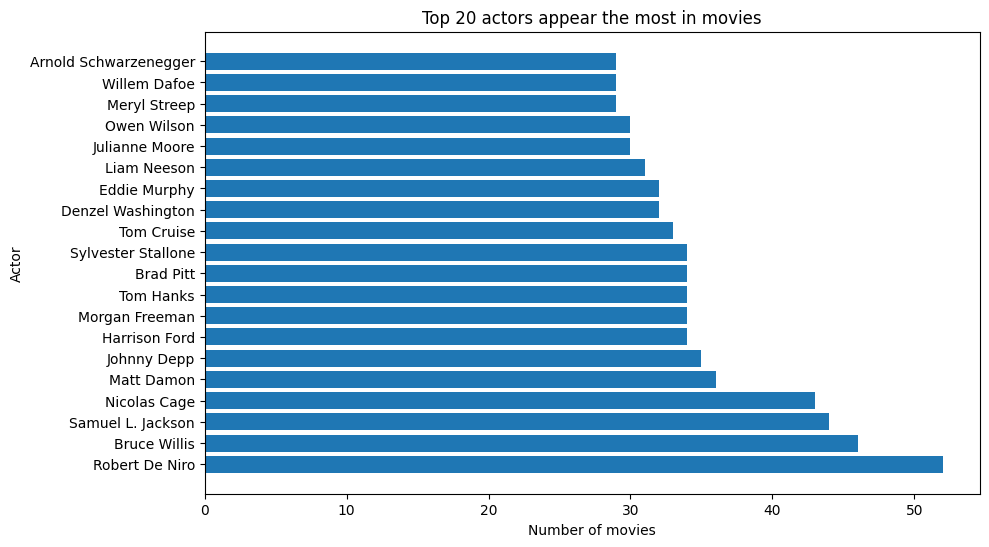

In [10]:
# Plot the top 20 actors
n = 20
top_actors = pd.DataFrame.from_dict(actors_count, orient="index", columns=["count"])
top_actors = top_actors.sort_values(by="count", ascending=False).head(n)
names = top_actors.index.tolist()
counts = top_actors["count"].tolist()

plt.figure(figsize=(10, 6))
plt.barh(names, counts)
plt.xlabel("Number of movies")
plt.ylabel("Actor")
plt.title(f"Top {n} actors appear the most in movies")
plt.show()

>With actors, many famous names with the biggest number of appearances are Robert De Niro, Bruce Willis, Samuel L. Jackson, Nicolas Cage and Matt Damon. <br>
Many other well-known actor are often in blockbusters right now such as Tom Cruise, Brad Pitt,...

<a id="top_movies"></a>
### Top movies based on votes/revenue_adj

>We are also curious which movie has the most votes in the society, as well as their revenue after release.

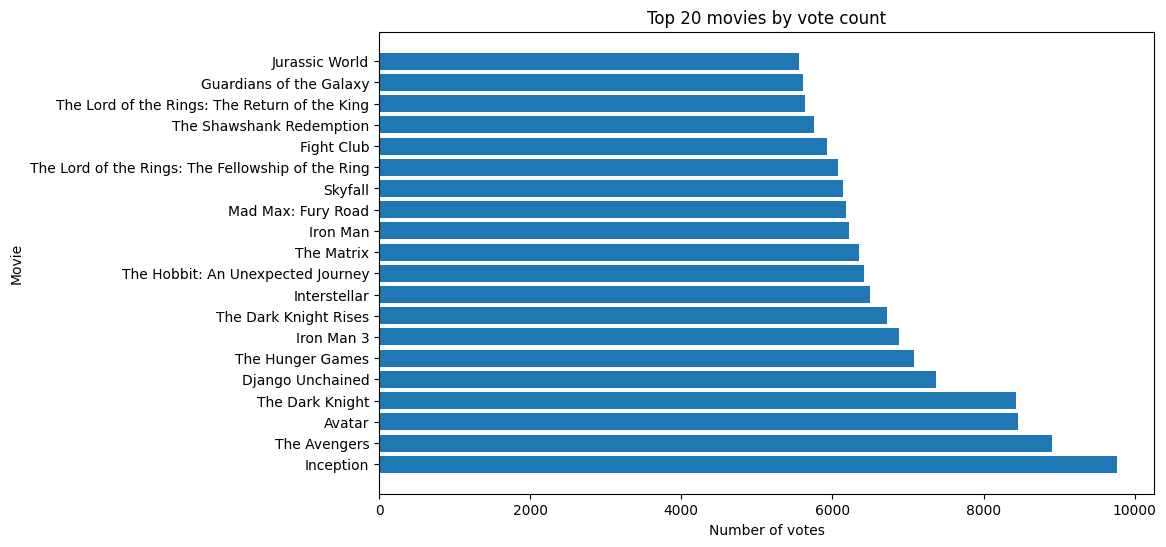

In [11]:
# Plot top 20 movies by vote count
n = 20
top_movies_by_vote = clean_df.sort_values(by="vote_count", ascending=False).head(n)
names = top_movies_by_vote["original_title"].tolist()
votes = top_movies_by_vote["vote_count"].tolist()

plt.figure(figsize=(10, 6))
plt.barh(names, votes)
plt.xlabel("Number of votes")
plt.ylabel("Movie")
plt.title(f"Top {n} movies by vote count")
plt.show()

> It is clear that Inception, The Avengers and Avatar are the top 3 films that get the most rating from the audience

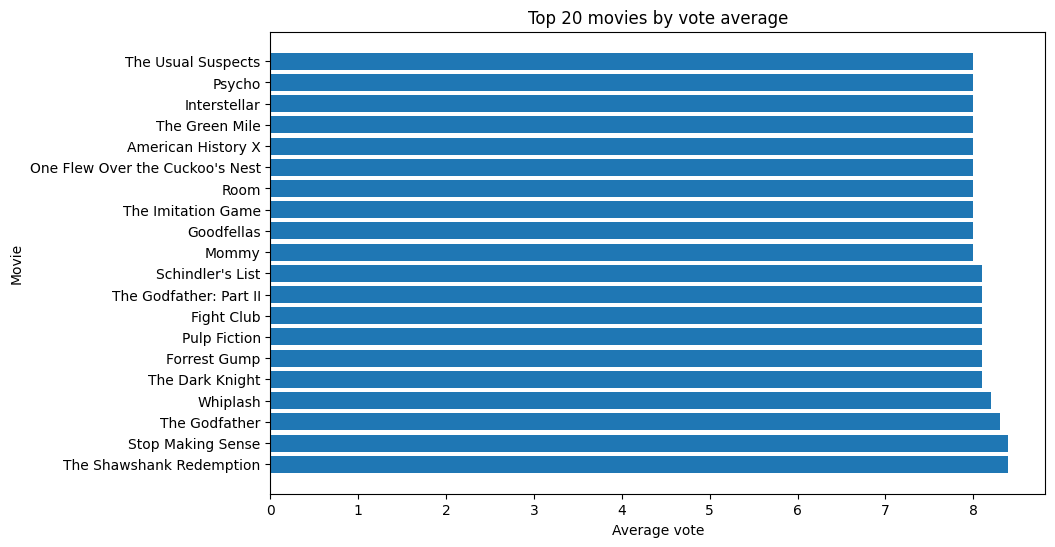

In [12]:
# Plot top 20 movies by vote average
n = 20
top_movies_by_vote = clean_df.sort_values(by="vote_average", ascending=False).head(n)
names = top_movies_by_vote["original_title"].tolist()
votes = top_movies_by_vote["vote_average"].tolist()

plt.figure(figsize=(10, 6))
plt.barh(names, votes)
plt.xlabel("Average vote")
plt.ylabel("Movie")
plt.title(f"Top {n} movies by vote average")
plt.show()

>The top movies with highest rating are The Shawshank Redemption, Stop Making Sense and The Godfather, which are different from the top vote count. 

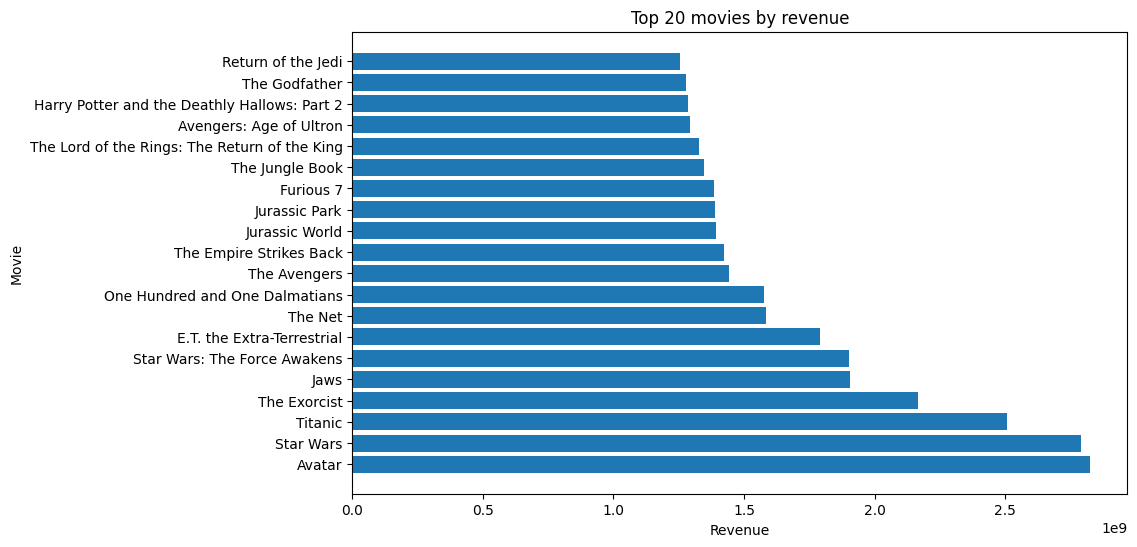

In [13]:
# Plot top 20 movies by revenue
n = 20
top_movies_by_revenue = clean_df.sort_values(by="revenue_adj", ascending=False).head(n)
names = top_movies_by_revenue["original_title"].tolist()
revenue = top_movies_by_revenue["revenue_adj"].tolist()

plt.figure(figsize=(10, 6))
plt.barh(names, revenue)
plt.xlabel("Revenue")
plt.ylabel("Movie")
plt.title(f"Top {n} movies by revenue")
plt.show()

>Movies with the most revenue are Avatar, Star Wars and Titanic. Other top movies by votes are also in the top 20, such as The Avengers and The Godfather

<a id="top_genres"></a>
### Top genres based on popularity/budget_adj/revenue_adj through years

Here, investigate the trend of genres throughout the years, based on popularity, budget and revenue

In [14]:
# First, get all the genres throughout the dataset
all_genres = clean_df["genres"].str.split("|", expand=True).stack().unique().tolist()
print(f"There are {len(all_genres)} genres in the dataset.")

There are 20 genres in the dataset.


In [15]:
# Get the total popularity, budget and revenue of each genre throughout years
def get_genre_feature_over_years(df, years, genres, features):
    genre_features = {feat: {genre: [] for genre in genres} for feat in features}
    for year in years:
        year_df = df[df["release_year"] == year]
        for feature, genre_feature in genre_features.items():
            for genre in genres:
                genre_feature[genre].append(year_df[year_df["genres"].str.contains(genre)][feature].sum())
    return [genre_features[key] for key in features]

years = sorted(clean_df["release_year"].unique().tolist())
genre_popularity, genre_budget, genre_revenue = get_genre_feature_over_years(clean_df, years, all_genres, ["popularity", "budget_adj", "revenue_adj"])

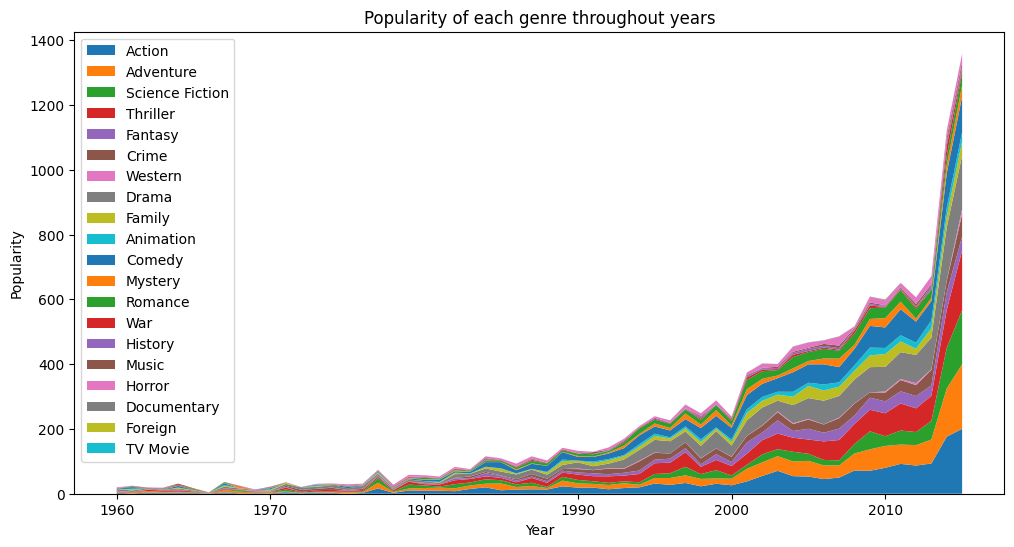

In [16]:
# Plot the popularity of each genre throughout years
popularity_through_years = [genre_popularity[genre] for genre in all_genres]

plt.figure(figsize=(12, 6))
plt.stackplot(years, popularity_through_years, labels=all_genres)
plt.legend(loc="upper left")
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.title("Popularity of each genre throughout years")
plt.show()

>Movies are gaining popularity throughout the years. In the 2010s, the total popularity are hundreds more than 50 years ago <br>
However, genres like Documentary, Foreign and TV Movie popularity are not changed much throughout the year

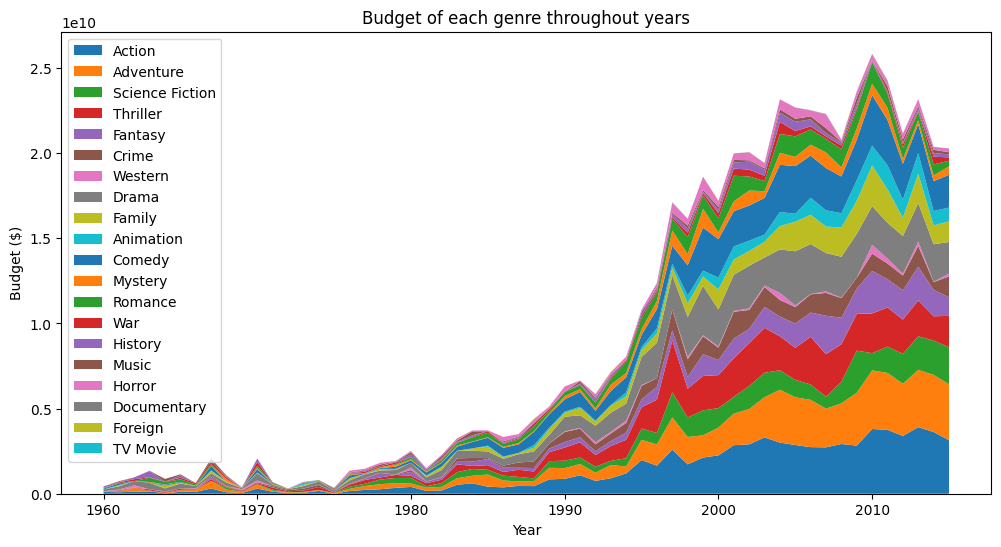

In [17]:
# Plot the budget of each genre throughout years
budget_through_years = [genre_budget[genre] for genre in all_genres]

plt.figure(figsize=(12, 6))
plt.stackplot(years, budget_through_years, labels=all_genres)
plt.legend(loc="upper left")
plt.xlabel("Year")
plt.ylabel("Budget ($)")
plt.title("Budget of each genre throughout years")
plt.show()

>The budget used for genres are also increasing, especially for Action, Adventure, Comedy and Drama.

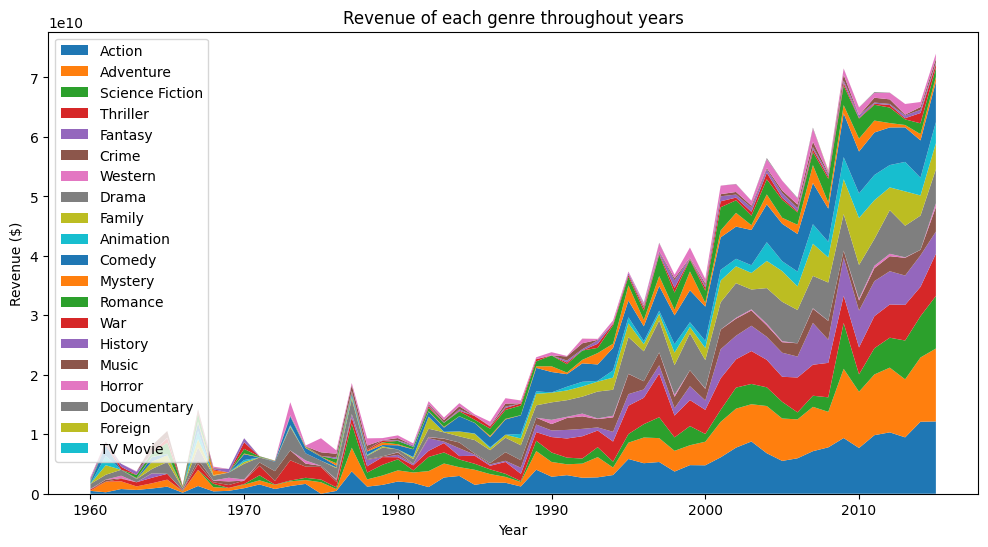

In [18]:
# Plot the revenue of each genre throughout years
revenue_through_years = [genre_revenue[genre] for genre in all_genres]

plt.figure(figsize=(12, 6))
plt.stackplot(years, revenue_through_years, labels=all_genres)
plt.legend(loc="upper left")
plt.xlabel("Year")
plt.ylabel("Revenue ($)")
plt.title("Revenue of each genre throughout years")
plt.show()

>The revenue for are also increasing (w.r.t to budget) Example: Action, Adventure, Comedy and Drama

<a id="avg_year"></a>
### Average budget_adj/revenue_adj of movies through years

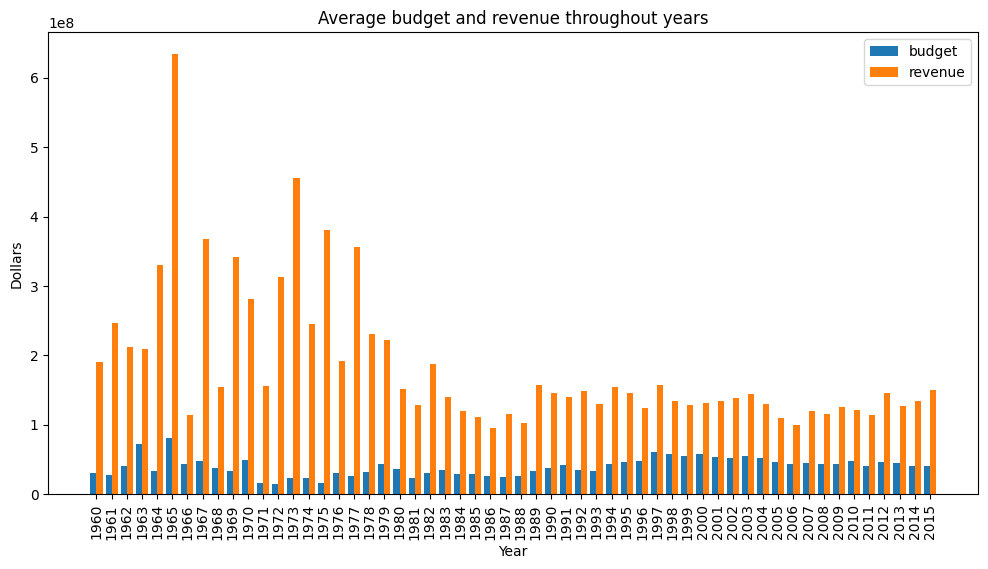

In [19]:
avg_through_years = clean_df[["budget_adj", "revenue_adj"]].groupby(clean_df["release_year"]).mean()

plt.figure(figsize=(12, 6))
x_axis = np.arange(len(avg_through_years.index))
plt.bar(x_axis-0.2, avg_through_years["budget_adj"], 0.4, label="budget")
plt.bar(x_axis+0.2, avg_through_years["revenue_adj"], 0.4, label="revenue")
plt.xticks(x_axis, avg_through_years.index, rotation=90)
plt.xlabel("Year")
plt.ylabel("Dollars")
plt.legend()
plt.title("Average budget and revenue throughout years")
plt.show()

>The number since 1990s seems to be stable, as the average amount of revenue is around 20M dollars, appears to be doubled that amount of budget

<a id="corr"></a>
### Is there any correlation between vote_average, popularity and budget_adj?

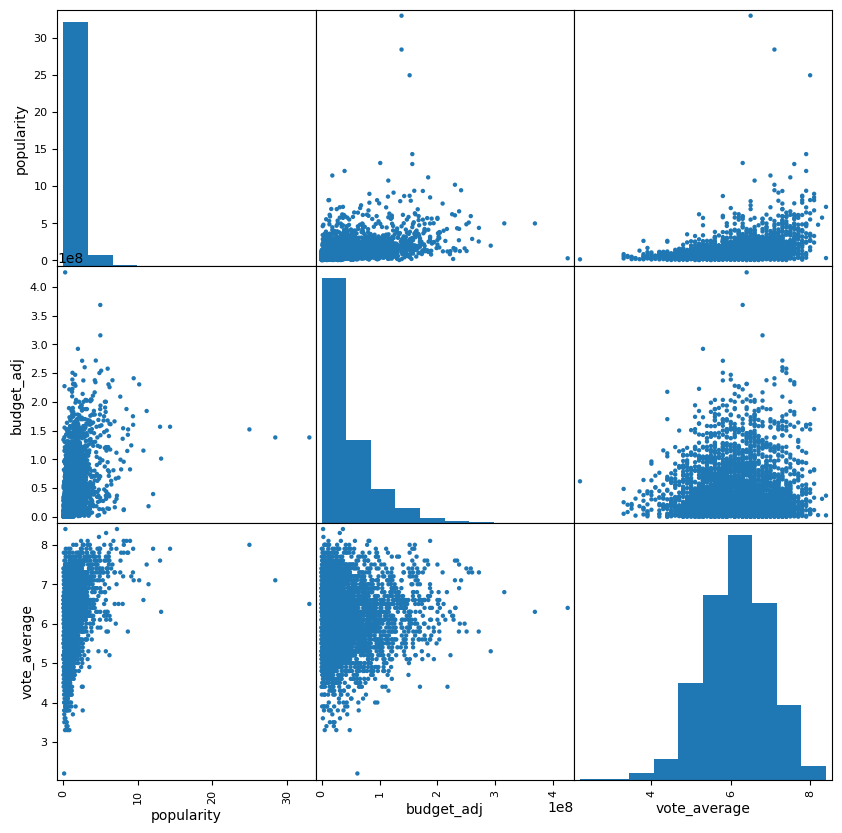

In [20]:
coor_df = clean_df[["popularity", "budget_adj", "vote_average"]]
pd.plotting.scatter_matrix(coor_df, figsize=(10,10), marker = 'o', hist_kwds = {'bins': 10}, s = 10, alpha = 1)
plt.show()

>Here, it is clear that there are some weak positive correlation between vote_average, budget and popularity in the dataset

In [21]:
# Inspect the true value of correlation between popularity, budget and vote average
coor_df.corr()

,popularity,budget_adj,vote_average
popularity,1.000000,0.398868,0.317809
budget_adj,0.398868,1.000000,0.036316
vote_average,0.317809,0.036316,1.000000


<a id='conclusions'></a>
## Conclusions

This dataset contains many useful information about movies since 1960. The analysis has shown that: 
<ul>
<li>There are many famous actors (like Robert De Niro, Bruce Willis,...) who casted in many films, and many famous directors (like Steven Spielberg, Clint Eastwood) who produces blockbusters all over these years</li>
<li>There are 20 unique movie genres but only some genres like Action, Adventure and Drama are gaining popularity as well as earning much money over these years</li>
<li>There are some correlations between some features of the dataset such as budget_adj and popularity</li>
</ul>

*Limitation*: There are many films in the dataset missing information about the cast and directors. Furthermore, many films are recorded to has 0 budget and revenue. Therefore, data cleaning is crucial before performing investigation.

*Further research can be done within each genre to better understand the movie trends over the time*

In [22]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 10 image(s).
[NbConvertApp] Writing 1471043 bytes to Investigate_a_Dataset.html
